<a href="https://colab.research.google.com/github/KulsoomA20/DLRL_Umme_Kulsoom_A/blob/main/CNN/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Loading Fashion-MNIST Data ---

--- Sample of Training Data ---


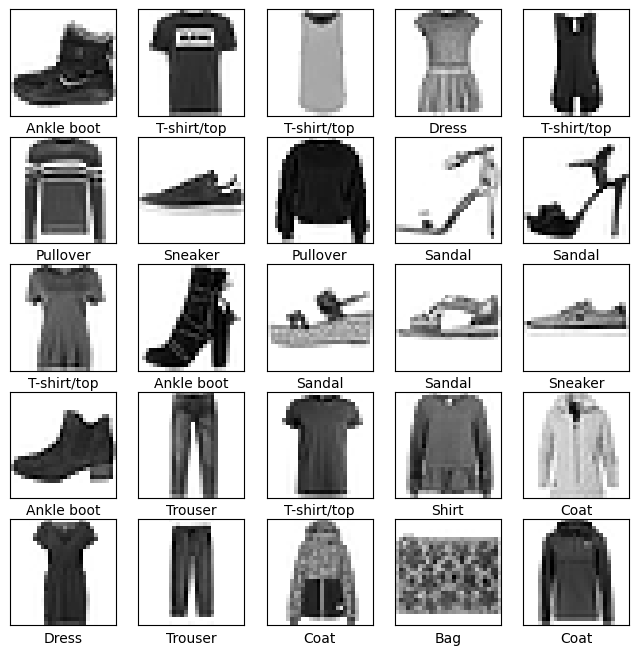


--- Model Summary  ---


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Model ---
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7398 - loss: 0.7185 - val_accuracy: 0.8705 - val_loss: 0.3645
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8764 - loss: 0.3388 - val_accuracy: 0.8900 - val_loss: 0.3092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8938 - loss: 0.2850 - val_accuracy: 0.8972 - val_loss: 0.2919
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9065 - loss: 0.2511 - val_accuracy: 0.8962 - val_loss: 0.2914
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9157 - loss: 0.2237 - val_accuracy: 0.9024 - val_loss: 0.2891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9254 - loss: 0.1992 - val_accuracy: 0.9031 - val_loss: 0.2909
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9336 - loss: 0.1796 - val_accuracy: 0.9040 - val_loss: 0.3033
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy:

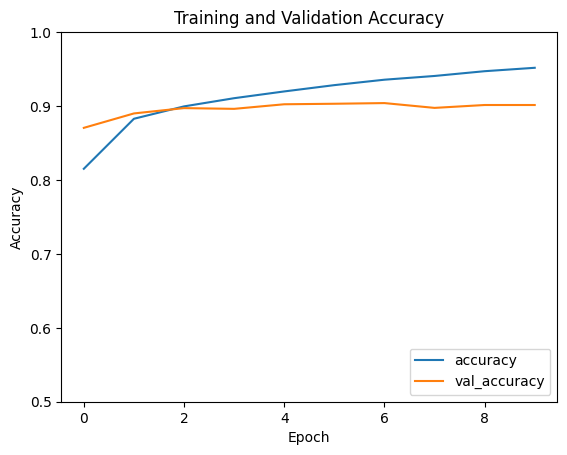

313/313 - 1s - 2ms/step - accuracy: 0.9014 - loss: 0.3732

Test Accuracy is 0.9014


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


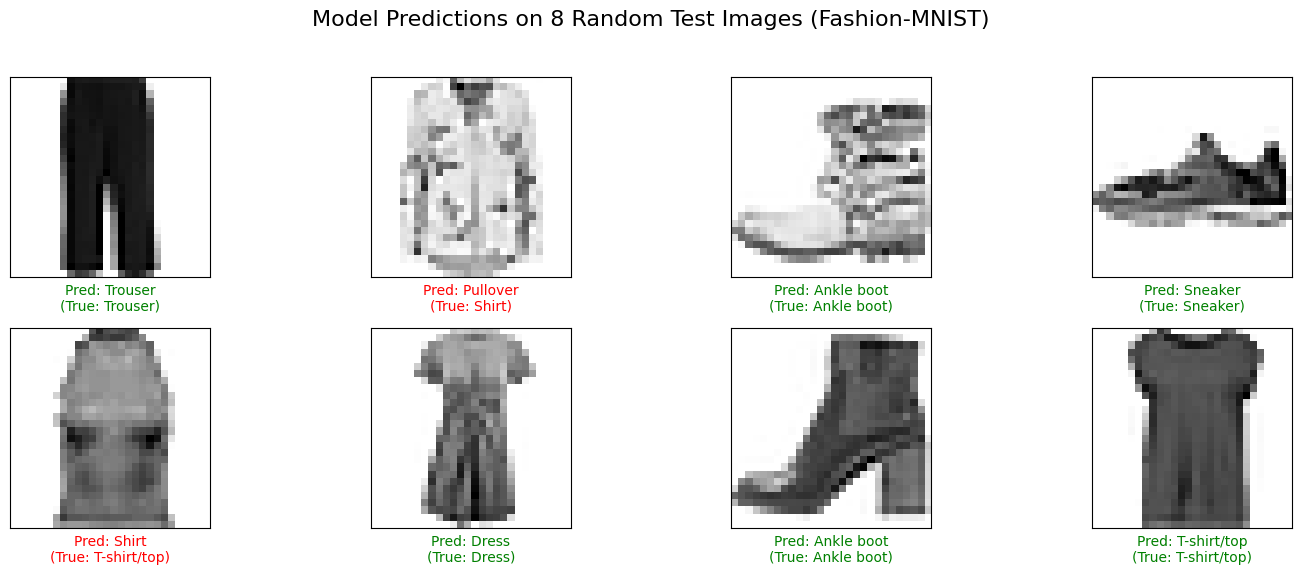

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

print("--- Loading Fashion-MNIST Data ---")
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

print("\n--- Sample of Training Data ---")
# Plotting a sample of images (5x5)
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # The image is 28x28x1, imshow needs to know to treat it as grayscale
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Creating the Convolutional Base

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # Output remains 10 classes

print("\n--- Model Summary  ---")
model.summary()

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("\n--- Training Model ---")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluating and Plotting the model
print("\n--- Model Evaluation Plot ---")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest Accuracy is {test_acc:.4f}')

# Choose 8 random indices from the test set
random_indices = random.sample(range(len(test_images)), 8)

sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions (logits) and get the class index (prediction)
predictions_logits = model.predict(sample_images)
predictions = np.argmax(predictions_logits, axis=1)

# Plot the 8 sample images with their predictions
plt.figure(figsize=(15, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Plot the grayscale image
    plt.imshow(sample_images[i].squeeze(), cmap=plt.cm.binary)

    # Get the predicted label name
    predicted_label_name = class_names[predictions[i]]
    true_label_name = class_names[sample_labels[i]]

    # Color the label based on correctness
    color = 'green' if predicted_label_name == true_label_name else 'red'

    # Display the result (Prediction and True Label)
    label_text = f"Pred: {predicted_label_name}\n(True: {true_label_name})"
    plt.xlabel(label_text, color=color, fontsize=10)

plt.suptitle("Model Predictions on 8 Random Test Images (Fashion-MNIST)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()